# 최단 경로 문제 종류

## 최단 경로 문제 종류


1. 단일 출발 최단 경로 문제
2. 단일 도착 최단 경로 문제
3. 단일 쌍 최단 경로 문제
4. 전체 쌍 최단 경로 문제

## 다익스트라 알고리즘


단일 출발 최단경로를 구하는 알고리즘이다.

우선순위 큐는 MinHeap 방식을 활용해서 구현해보자

## 구현을 위해 참고해야할 JAVA 문법


### PriorityQueue
- add(), offer(): queue add
- peek(): queue get
- poll(): queue pop
- size(): queue size

In [1]:
public class Edge implements Comparable<Edge> {
    public int distance;
    public String vertex;
    
    public Edge(int distance, String vertex){
        this.distance = distance;
        this.vertex = vertex;
    }
    
    
    // System.out.println()으로 객체 자체 출력시,
    public String toString(){
        return "vertex: " + this.vertex + ", distance: " + this.distance;
    }
    
    @Override
    public int compareTo(Edge edge){
        return this.distance - edge.distance;
    }
}

In [2]:
import java.util.PriorityQueue;

PriorityQueue<Edge> priorityQueue = new PriorityQueue<Edge>();

priorityQueue.add(new Edge(2, "A"));
priorityQueue.add(new Edge(5, "B"));
priorityQueue.offer(new Edge(1, "C"));
priorityQueue.offer(new Edge(7, "D"));

true

In [3]:
Edge edge1 = priorityQueue.poll(); // poll(): 맨 앞 데이터 pop
System.out.println(edge1);
System.out.println(priorityQueue);

vertex: C, distance: 1
[vertex: A, distance: 2, vertex: B, distance: 5, vertex: D, distance: 7]


In [4]:
priorityQueue.peek(); // priorityQueue 의 맨 앞 노드 확인

vertex: A, distance: 2

In [5]:
priorityQueue.size() //큐 사이즈

3

# 다익스트라 구현

.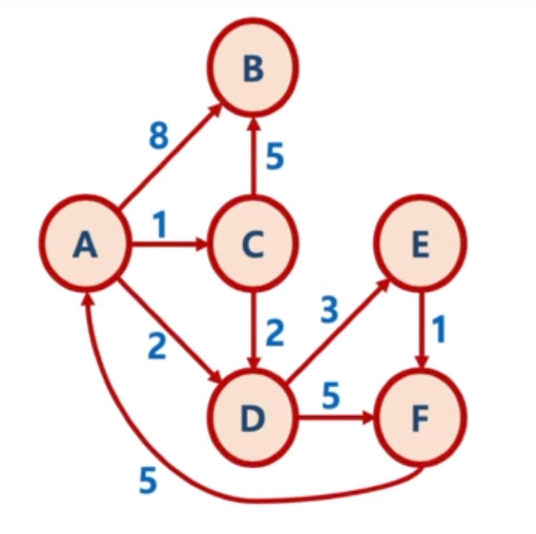

## 그림대로 Map 만들기

In [6]:
import java.util.HashMap;

HashMap<String, ArrayList<Edge>> graph = new HashMap<String, ArrayList<Edge>>();
graph.put("A", new ArrayList<Edge>(Arrays.asList(new Edge(8,"B"), new Edge(1, "C"), new Edge(2, "D"))));
graph.put("B", new ArrayList<Edge>());
graph.put("C", new ArrayList<Edge>(Arrays.asList(new Edge(5,"B"), new Edge(2, "D"))));
graph.put("D", new ArrayList<Edge>(Arrays.asList(new Edge(3,"E"), new Edge(5, "F"))));
graph.put("E", new ArrayList<Edge>(Arrays.asList(new Edge(1,"F"))));
graph.put("F", new ArrayList<Edge>(Arrays.asList(new Edge(5,"A"))));


## * 참고: Hashmap 에 들어 있는 모든 key 가져오기

In [7]:
for (String key: graph.keySet()){
    System.out.println(key);
    System.out.println(graph.get(key));
}

A
[vertex: B, distance: 8, vertex: C, distance: 1, vertex: D, distance: 2]
B
[]
C
[vertex: B, distance: 5, vertex: D, distance: 2]
D
[vertex: E, distance: 3, vertex: F, distance: 5]
E
[vertex: F, distance: 1]
F
[vertex: A, distance: 5]


## 다익스트라 알고리즘 구현

- 첫 정점을 기준으로 배열을 선언하여 첫 정점에서 각 정점까지의 거리를 저장
    - 초기에는 첫 정점의 거리는 0, 나머지는 무한대로 저장

In [21]:
public class Edge implements Comparable<Edge> {
    public int distance;
    public String vertex;
    
    public Edge(int distance, String vertex){
        this.distance = distance;
        this.vertex = vertex;
    }
    
    // System.out.println()으로 객체 자체 출력시,
    public String toString(){
        return "vertex: " + this.vertex + ", distance: " + this.distance;
    }
    
    @Override
    public int compareTo(Edge edge){
        return this.distance - edge.distance;
    }
}

In [22]:
import java.util.PriorityQueue;
import java.util.HashMap;
import java.util.Arrays;
import java.util.ArrayList;


public class DijkstraPath{
    public HashMap<String, Integer> dijkstraFunc(HashMap<String, ArrayList<Edge>> graph, String start){
        
        ArrayList<Edge> nodeList;
        Edge edgeNode, adjacentNode;
        // 큐에서 꺼낸 노드의 거리, 큐에서 꺼낸 노드와 관련된 노드의 거리, 
        // 큐에서 꺼낸 노드의 거리 + 관련된 노드의 거리
        int currentDistance, weight, distance; 
        String currentNode, adjacent;
        
        // 시작 노드와 다른 노드와의 거리 저장 배열
        HashMap<String, Integer> distances = new HashMap<String, Integer>();
        
        for (String key: graph.keySet()){
            distances.put(key, Integer.MAX_VALUE); // 거리 저장 배열을 무한대로 초기화
        }
        distances.put(start, 0); // 시작점은 0으로 초기화
        
        PriorityQueue<Edge> priorityQueue = new PriorityQueue<Edge>();
        priorityQueue.add(new Edge(distances.get(start), start));
        
        // 알고리즘 작성
        while(priorityQueue.size() > 0) {
            edgeNode = priorityQueue.poll();
            currentDistance = edgeNode.distance;
            currentNode = edgeNode.vertex;
            
            if (distances.get(currentNode) < currentDistance) {
                continue;
            }
            
            nodeList = graph.get(currentNode);
            for (int index = 0; index < nodeList.size(); index ++) {
                adjacentNode = nodeList.get(index);
                adjacent = adjacentNode.vertex;
                weight = adjacentNode.distance;
                distance = currentDistance + weight;
                
                // 노드들의 거리 리스트의 값이 큐에서 꺼낸 노드로 가는 경로보다 크다면
                if (distance < distances.get(adjacent)) {
                    // 노드들의 거리 리스트에서 해당 노드의 거리를 업데이트하고
                    distances.put(adjacent, distance);
                    // 큐에 새로 집어 넣음
                    priorityQueue.add(new Edge(distance, adjacent));
                }
            }
        }
        
        return distances;
    }
}

In [23]:
import java.util.HashMap;

HashMap<String, ArrayList<Edge>> graph = new HashMap<String, ArrayList<Edge>>();
graph.put("A", new ArrayList<Edge>(Arrays.asList(new Edge(8,"B"), new Edge(1, "C"), new Edge(2, "D"))));
graph.put("B", new ArrayList<Edge>());
graph.put("C", new ArrayList<Edge>(Arrays.asList(new Edge(5,"B"), new Edge(2, "D"))));
graph.put("D", new ArrayList<Edge>(Arrays.asList(new Edge(3,"E"), new Edge(5, "F"))));
graph.put("E", new ArrayList<Edge>(Arrays.asList(new Edge(1,"F"))));
graph.put("F", new ArrayList<Edge>(Arrays.asList(new Edge(5,"A"))));

In [24]:
DijkstraPath dObject = new DijkstraPath();
dObject.dijkstraFunc(graph, "A");

{A=0, B=6, C=1, D=2, E=5, F=6}